In [67]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.draw import polygon, circle
from skimage.morphology import thin
from skimage.morphology import skeletonize
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from copy import copy

from ipywidgets import FloatProgress
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
%cd "C:\Users\User\Documents\pendrive\Sample interferograms"
interferogram_path = "s1003_17 532nm end on interferometry (1).JPG"
interferogram = imread(interferogram_path)
interferogram = rgb2gray(interferogram)

C:\Users\User\Documents\pendrive\Sample interferograms


<IPython.core.display.Javascript object>


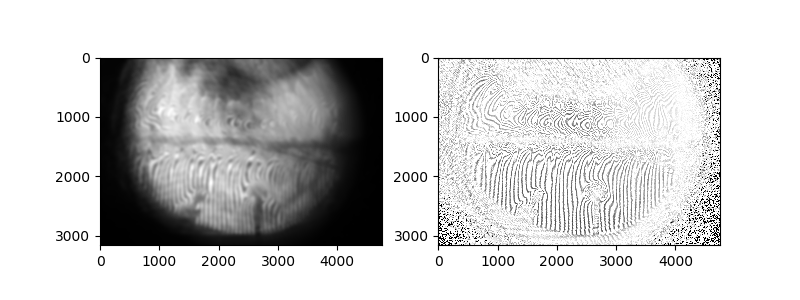

In [64]:
blur = 25
blurred_interferogram = gaussian(interferogram, blur)
normalised_interferogram = interferogram/blurred_interferogram
fig, ax=plt.subplots(1, 2, figsize=(8,3))
ax[0].imshow(blurred_interferogram, cmap='gray')
ax[1].imshow(normalised_interferogram, cmap='gray', clim=[0,1])

## Blur as a feature removal tool

<IPython.core.display.Javascript object>


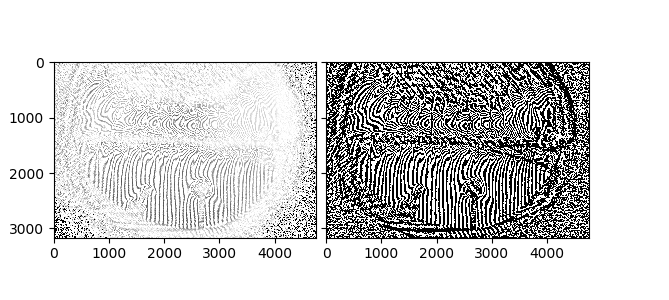

In [76]:
blur = 5
blurred_interferogram2 = gaussian(normalised_interferogram, blur)
ifftim=abs((np.fft.ifft2(fftim)))
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(blurred_interferogram2>1, cmap='gray', clim=[0,1])

In [77]:
thinned_interferogram2 = thin(blurred_interferogram2>1, max_iter=1000)

<IPython.core.display.Javascript object>


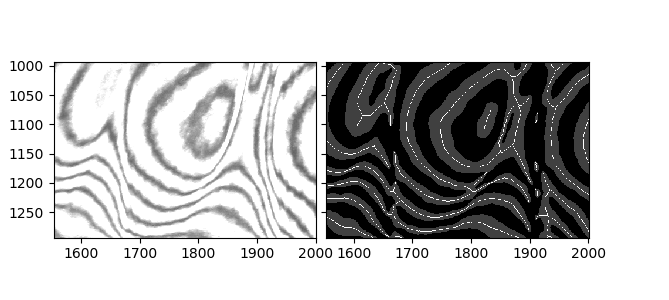

In [80]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow((blurred_interferogram2>1)*1+thinned_interferogram2*3, cmap='gray')

In [79]:
imsave('test_blur.png',thinned_interferogram2*255)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: test_blur.png is a low contrast image
  warn('%s is a low contrast image' % fname)


## Brightness normalisation

In [87]:
interferogram_norm = copy(interferogram)
gauss = gaussian(interferogram, 5)
div = 100
for i in range(0, len(interferogram), int(len(interferogram)/div)):
    for j in range(0, len(interferogram[0]), int(len(interferogram[0])/div)):
        part = interferogram_norm[i:i+int(len(interferogram)/div), j:j+int(len(interferogram[0])/div)]
        g_part = gauss[i:i+int(len(interferogram)/div), j:j+int(len(interferogram[0])/div)]
        part -= np.amin(g_part)
        g_part -= np.amin(g_part)
        part /= np.amax(g_part)
#         print(np.amax(g_part))
        interferogram_norm[i:i+int(len(interferogram)/div), j:j+int(len(interferogram[0])/div)] = part

<IPython.core.display.Javascript object>


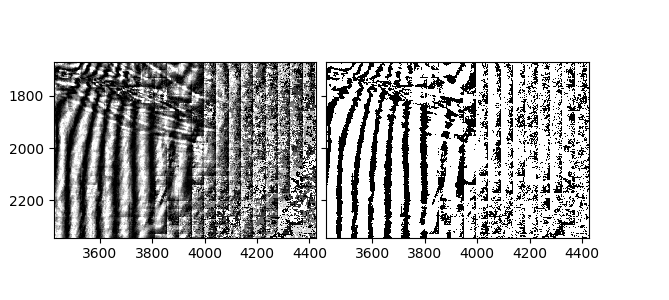

In [88]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(interferogram_norm, cmap='gray', clim=[0,1])
ax[1].imshow(interferogram_norm>0.2, cmap='gray', clim=[0,1])

## Normalisation attempts

In [184]:
from skimage.filters import apply_hysteresis_threshold
hyst = apply_hysteresis_threshold(interferogram, 0.3, 0.5)

ImportError: cannot import name 'apply_hysteresis_threshold'

In [4]:
from skimage.filters import (threshold_niblack,
                             threshold_sauvola)
window_size=51
thresh_niblack = threshold_niblack(interferogram, window_size=window_size, k=0.3)
thresh_sauvola = threshold_sauvola(interferogram, window_size=window_size)
binary_niblack = interferogram > thresh_niblack
binary_sauvola = interferogram > thresh_sauvola

<IPython.core.display.Javascript object>


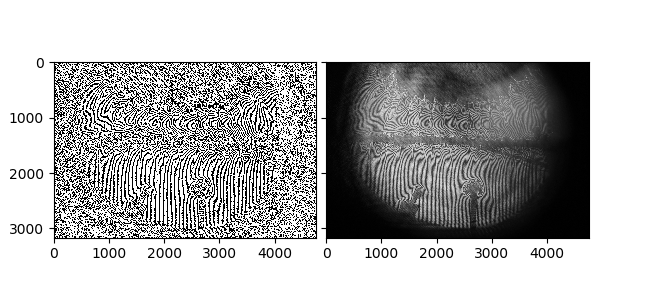

In [5]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(binary_niblack, cmap='gray')
ax[1].imshow(interferogram, cmap='gray')

## Fourier

<IPython.core.display.Javascript object>


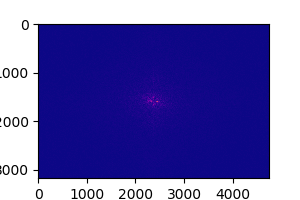

In [65]:
fftim=(np.fft.fftshift(np.fft.fft2(normalised_interferogram)))
fig, ax=plt.subplots(figsize=(3,2))
ax.imshow(abs(fftim), cmap='plasma', clim=[0,100000])

In [85]:
mask = np.zeros_like(abs(fftim))+0
y_size, x_size = fftim.shape
rr, cc = circle(r=y_size/2, c=x_size/2, radius=300, shape=mask.shape)
mask[rr, cc] = 1
mask = gaussian(mask, 10)
fftim_masked = fftim*mask

<IPython.core.display.Javascript object>


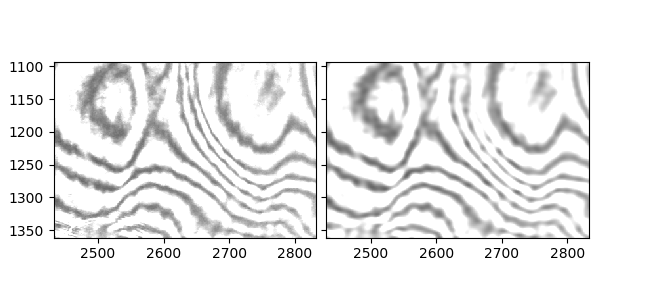

In [86]:
ifftim=abs((np.fft.ifft2(fftim_masked)))
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow(ifftim, cmap='gray', clim=[0,1])

## Skeletonize

In [4]:
skeletonised_interferogram = skeletonize(normalised_interferogram>0.7)

<IPython.core.display.Javascript object>


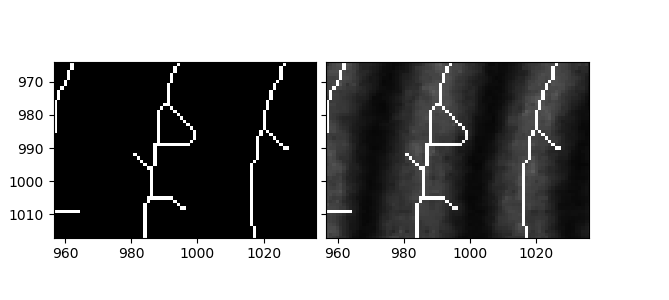

In [7]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(skeletonised_interferogram, cmap='gray')
ax[1].imshow(normalised_interferogram+skeletonised_interferogram*5, cmap='gray', clim=[0,6])

In [8]:
thinned_interferogram = thin(normalised_interferogram>0.7, max_iter=1000)

<IPython.core.display.Javascript object>


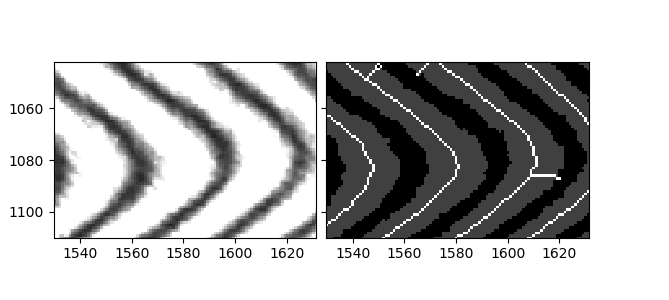

In [9]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(normalised_interferogram, cmap='gray', clim=[0,1])
ax[1].imshow((normalised_interferogram>0.7)*1+thinned_interferogram*3, cmap='gray')

## Contours

In [6]:
from skimage.measure import find_contours
contours = find_contours(binary_niblack, 0.5)

### Find contours

<IPython.core.display.Javascript object>


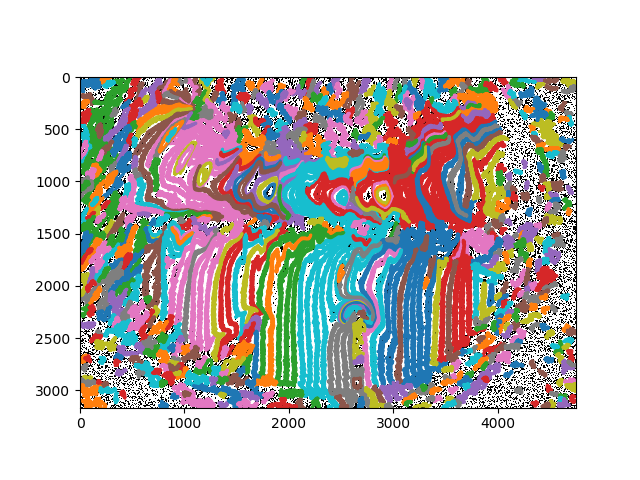

In [7]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(binary_niblack, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    if len(contour)>500:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

### Smooth out the contours

In [57]:
f = FloatProgress(min=0, max=len(contours)-1)
display(f)

smoothed_contours = []
painted_in = np.zeros_like(interferogram)
for n, contour in enumerate(contours):
    smoothed_contour = []
    length = len(contour)
    if 500<length:
        for i in range(length):
            proposed = np.mean(np.take(contour, range(i-10, i+10), mode='wrap', axis=0), axis=0).astype('int')
            if len(smoothed_contour) != 0 and (proposed[0] != smoothed_contour[-1][0] or proposed[1] != smoothed_contour[-1][1]):
                if (proposed[0]-smoothed_contour[-1][0])**2+(proposed[1]-smoothed_contour[-1][1])**2 > 2:
                    smoothed_contour.append([int(np.mean((proposed[0],smoothed_contour[-1][0]))), int(np.mean((proposed[1],smoothed_contour[-1][1])))])
                smoothed_contour.append(proposed)
            elif len(smoothed_contour) == 0:
                smoothed_contour.append(proposed)
        smoothed_contour = np.array(smoothed_contour)
        painted_in[smoothed_contour[:,0], smoothed_contour[:,1]] = 0.5
        smoothed_contours.append(smoothed_contour)
        f.value = n
f.value = len(contours)-1
smoothed_contours = np.array(smoothed_contours)
#         if len(smoothed_contours) > 10:
#             break

FloatProgress(value=0.0, max=115921.0)

<IPython.core.display.Javascript object>


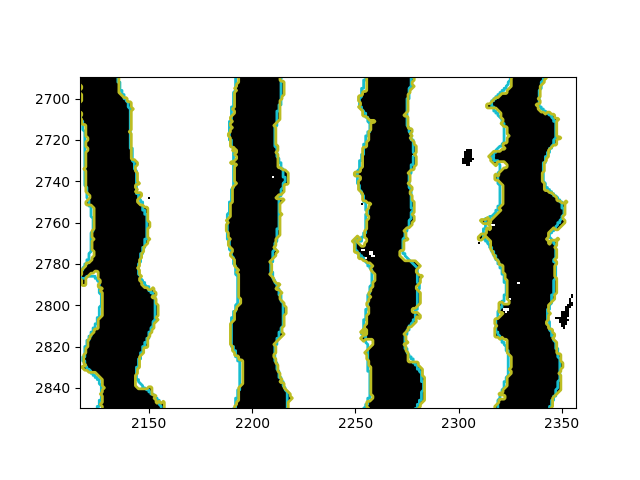

In [12]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(binary_niblack, cmap=plt.cm.gray)

for n, contour in enumerate(smoothed_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
for n, contour in enumerate(contours):
    if len(contour)>500:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
plt.show()

### Smoothing heuristics

In [158]:
smoothed_contours = []
for n, contour in enumerate(contours):
    smoothed_contour = []
    length = len(contour)
    if length > 1500 and contour[0,0]==contour[-1,0] and contour[0,1]==contour[-1,1]:
#         print(n)
        for i in range(length):
            smoothed_contour.append(np.mean(np.take(contour, range(i-10, i+10), mode='wrap', axis=0), axis=0).astype('int'))
        smoothed_contour = np.array(smoothed_contour)
        painted_in[smoothed_contour[:,0], smoothed_contour[:,1]] = 0.5
        smoothed_contours.append(smoothed_contour)
smoothed_contours = np.array(smoothed_contours)
#         if len(smoothed_contours) > 10:
#             break

KeyboardInterrupt: 

In [ ]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
# ax.imshow(normalised_interferogram>0.7, cmap=plt.cm.gray)

for n, contour in enumerate(smoothed_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
for n, contour in enumerate(contours):
    if len(contour)>500:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

# ax.axis('image')
plt.show()

### Paint in the contours

FloatProgress(value=0.0, max=678.0)

<IPython.core.display.Javascript object>


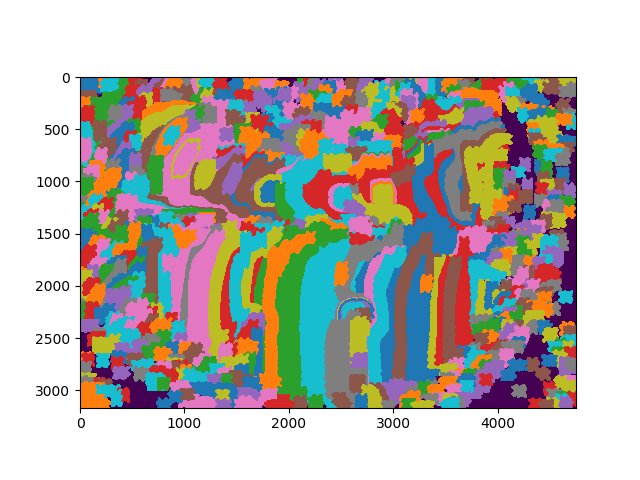

In [58]:
painted_in = np.zeros_like(interferogram)
f = FloatProgress(min=0, max=len(smoothed_contours)-1)

display(f)
# contour = smoothed_contours[590].astype(int)
limits = [[] for i in interferogram[0]]
for n, contour in enumerate(smoothed_contours):
#     print(len(contour))
# contour = np.array(contour).astype(int)
    for i in range(len(contour)):
#         print(contour[i])
        colour = -1
        direction = contour[(i+1)%len(contour),1]-contour[i-1,1]
        if direction > 0:
            colour = 1
        elif direction < 0:
            colour = 0
        else:
            direction = ((contour[i,1]-contour[i-1,1])*(contour[i,0]+contour[i-1,0])
                        + (contour[(i+1)%len(contour),1]-contour[i,1])*(contour[(i+1)%len(contour),0]+contour[i,0]))
            if contour[(i+1)%len(contour),0]-contour[i-1,0]:
                if direction > 0:
                    colour = 0
                elif direction <= 0:
                    colour = 1
        if colour != -1:
            paint_limit = 0
            for limit in limits[contour[i,1]]:
                if limit < contour[i,0] and paint_limit < limit:
                    paint_limit = limit
            painted_in[paint_limit+1:contour[i,0], contour[i,1]] = colour
            limits[contour[i,1]].append(contour[i,0])
            painted_in[contour[i,0], contour[i,1]] = 1
    f.value = n
#     if n == 9:
#         break

plt.imshow(painted_in)
# plt.plot(contour[:,1],contour[:,0])

In [59]:
plt.imshow(painted_in)
for n, contour in enumerate(smoothed_contours):
    plt.plot(contour[:, 1], contour[:, 0], 'x--', linewidth=2)

In [ ]:
# f = FloatProgress(min=0, max=len(smoothed_contours))
f = FloatProgress(min=0, max=len(smoothed_contours))

display(f)

for n, contour in enumerate(smoothed_contours):
    print(len(contour))
    direction = 0
    for i in range(len(contour)):
        direction += (contour[i,1]-contour[i-1,1])*(contour[i,0]+contour[i-1,0])
    if direction > 0:
        colour = 0
    else:
        colour = 1
    painted_in[contour[:,0], contour[:,1]] = colour
    painted_in[polygon(contour[:,0],contour[:,1])] = colour
    f.value = n
#     if n == 9:
#         break

plt.imshow(painted_in)
# plt.plot(contour[:,1],contour[:,0])

FloatProgress(value=0.0, max=610.0)

527
517
781
1127
977
1295
1133
1223
889
1497
1203
949
3253
725
2315
701
705
951
815
887
641
1635
721
599
735
717
1127
695
1435
629
799
1729
505
821
1047
651
2281
707
603
1565
857
1649
11169
1811
673
913
645
2751
545
749
645
1115
2735
1109
1411
1225
1313
555
1391
531
849
2451
1103
549
773
665
503
57215
723
671
3677
651
633


In [62]:
thinned_interferogram2 = thin((painted_in), max_iter=100)

In [10]:
thinned = thin(painted_in, max_iter=10)

<IPython.core.display.Javascript object>


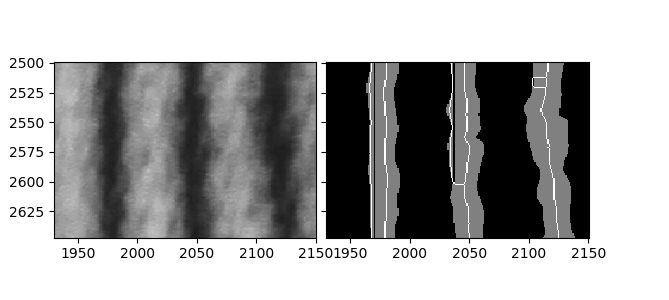

In [31]:
'''Set figure size (in inches)'''
fig=plt.figure(figsize=(6.69,3))
'''Set up image grid to show two images and a colourbar'''
ax = ImageGrid(fig, rect=(0.08,0.1,0.8,0.8),
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 )
ax[0].imshow(interferogram, cmap='gray', clim=[0,1])
ax[1].imshow((painted_in)*1+thinned_interferogram2, cmap='gray')

In [63]:
imsave('test_new_paint2.png',thinned_interferogram2*255)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: test_new_paint2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


## Paint in with blur

In [167]:
contour = contours[50541].astype(int)
painted_in = np.zeros_like(normalised_interferogram)
direction = 0
for i in range(len(contour)):
    direction += (contour[i,1]-contour[i-1,1])*(contour[i,0]+contour[i-1,0])
if direction > 0:
    colour = 0
else:
    colour = 1
painted_in[contour[:,0], contour[:,1]] = colour
painted_in[polygon(contour[:,0],contour[:,1])] = colour

In [173]:
thinned = skeletonize(gaussian(painted_in,3)>0.5)

<IPython.core.display.Javascript object>


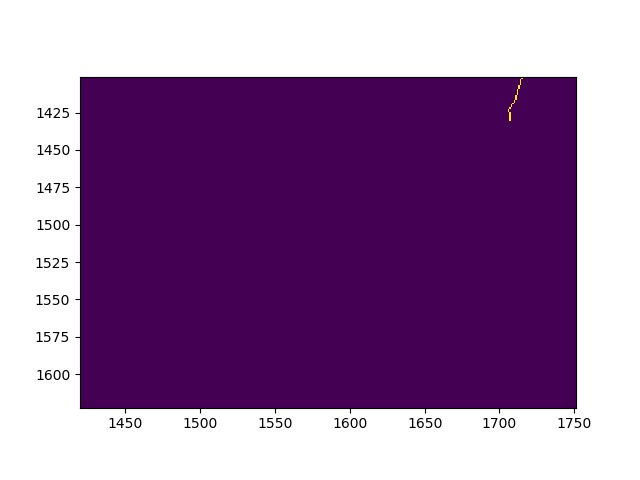

In [174]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(painted_in*1+thinned)
plt.show()

In [179]:
f = FloatProgress(min=0, max=len(contours)-1)
display(f)
final = np.zeros_like(normalised_interferogram)

for n, contour in enumerate(contours):
    if len(contour) > 1500 and contour[0,0]==contour[-1,0] and contour[0,1]==contour[-1,1]:
        contour = np.array(contour).astype(int)
        painted_in = np.zeros_like(normalised_interferogram)
        direction = 0
        for i in range(len(contour)):
            direction += (contour[i,1]-contour[i-1,1])*(contour[i,0]+contour[i-1,0])
        if direction > 0:
            colour = 0
        else:
            colour = 1
        painted_in[contour[:,0], contour[:,1]] = colour
        painted_in[polygon(contour[:,0],contour[:,1])] = colour
        thinned = skeletonize(gaussian(painted_in,3)>0.5)
        final = np.logical_or(final, thinned)
        print(n)
        f.value = n

FloatProgress(value=0.0, max=112949.0)

857
2058
2942
3535
3909
4739
5799
8397
10212
11497
12149
12350
12492
13180
13806
14185
15974
18098
18158
18750
18804
19141
20010
20606
21496
21749
22199
22582
23128
23200
23630
23736
23997
24121
25389
25901
26816
27175
27885
27964
28051
29583
29663
29973
30622
30942
31208
31461
31823
31888
31943
32150
32672
32741
33228
33334
33442
33927
34356
34661
35093
35374
35462
35673
35821
36397
36421
37398
37523
40617
41593
41924
42624
44618
44649
45514
45622
46185
46297
47493
47636
47786
48790
49143
49303
49862
50021
50146
50541
50981
51031
51472
51591
51637
52015
52354
52444
52594
53348
53586
53737
53765
53766
53944
54357
54410
54519
54555
54746
55242
55417
55618
56158
56174
56266
56432
56539
56844
56984
57008
57209
57210
57808
58398
58467
58723
58769
59121
59969
59975
60079
60302
60551
60837
61360
61899
62147
62737
63466
64119
67819
69379
69845
71118
71858
71876
72551
73597
73816
74668
74859
75295
75367
75800
76278
76495
77638
78970
80361
82630
83949
85613
86122
86649
87048
87144
87246
88367
8

In [180]:
plt.imshow(final)

In [181]:
imsave('test_thin_per_fringe.png',final*255)

C:\Users\User\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: test_thin_per_fringe.png is a low contrast image
  warn('%s is a low contrast image' % fname)
